In [8]:
import sys, collections, csv


def accumulate():
    min_strength = 0#this is a minimal strength of the connection to be taken into account.
    fname = "output"

    readings = collections.defaultdict(dict)
    basis = set()
    matrix = []

    with open(fname) as f:
        content = f.readlines()

    for l in content:
        ls = l.split()
        if len(ls) == 3:
            [t,b,v] = ls
            readings[t][b] = v
            min_strength = min(min_strength, int(v))
            basis.add(b)

    basis = sorted(list(basis))
    
    timestamps = readings.keys()
    timestamps.sort(key=lambda x: float(x))
    i=1
    
    for t in timestamps:
        row = []
        i = i+1
        for b in basis:
            if b not in readings[t]:        
                row.append(min_strength-1) # too silent
            else:
                row.append(readings[t][b])
        matrix.append(row)

   

    out_file  = open("file_with_points.csv", "w")
    csvw = csv.writer(out_file,lineterminator='\n')    
    csvw.writerows(matrix)

In [9]:
accumulate()

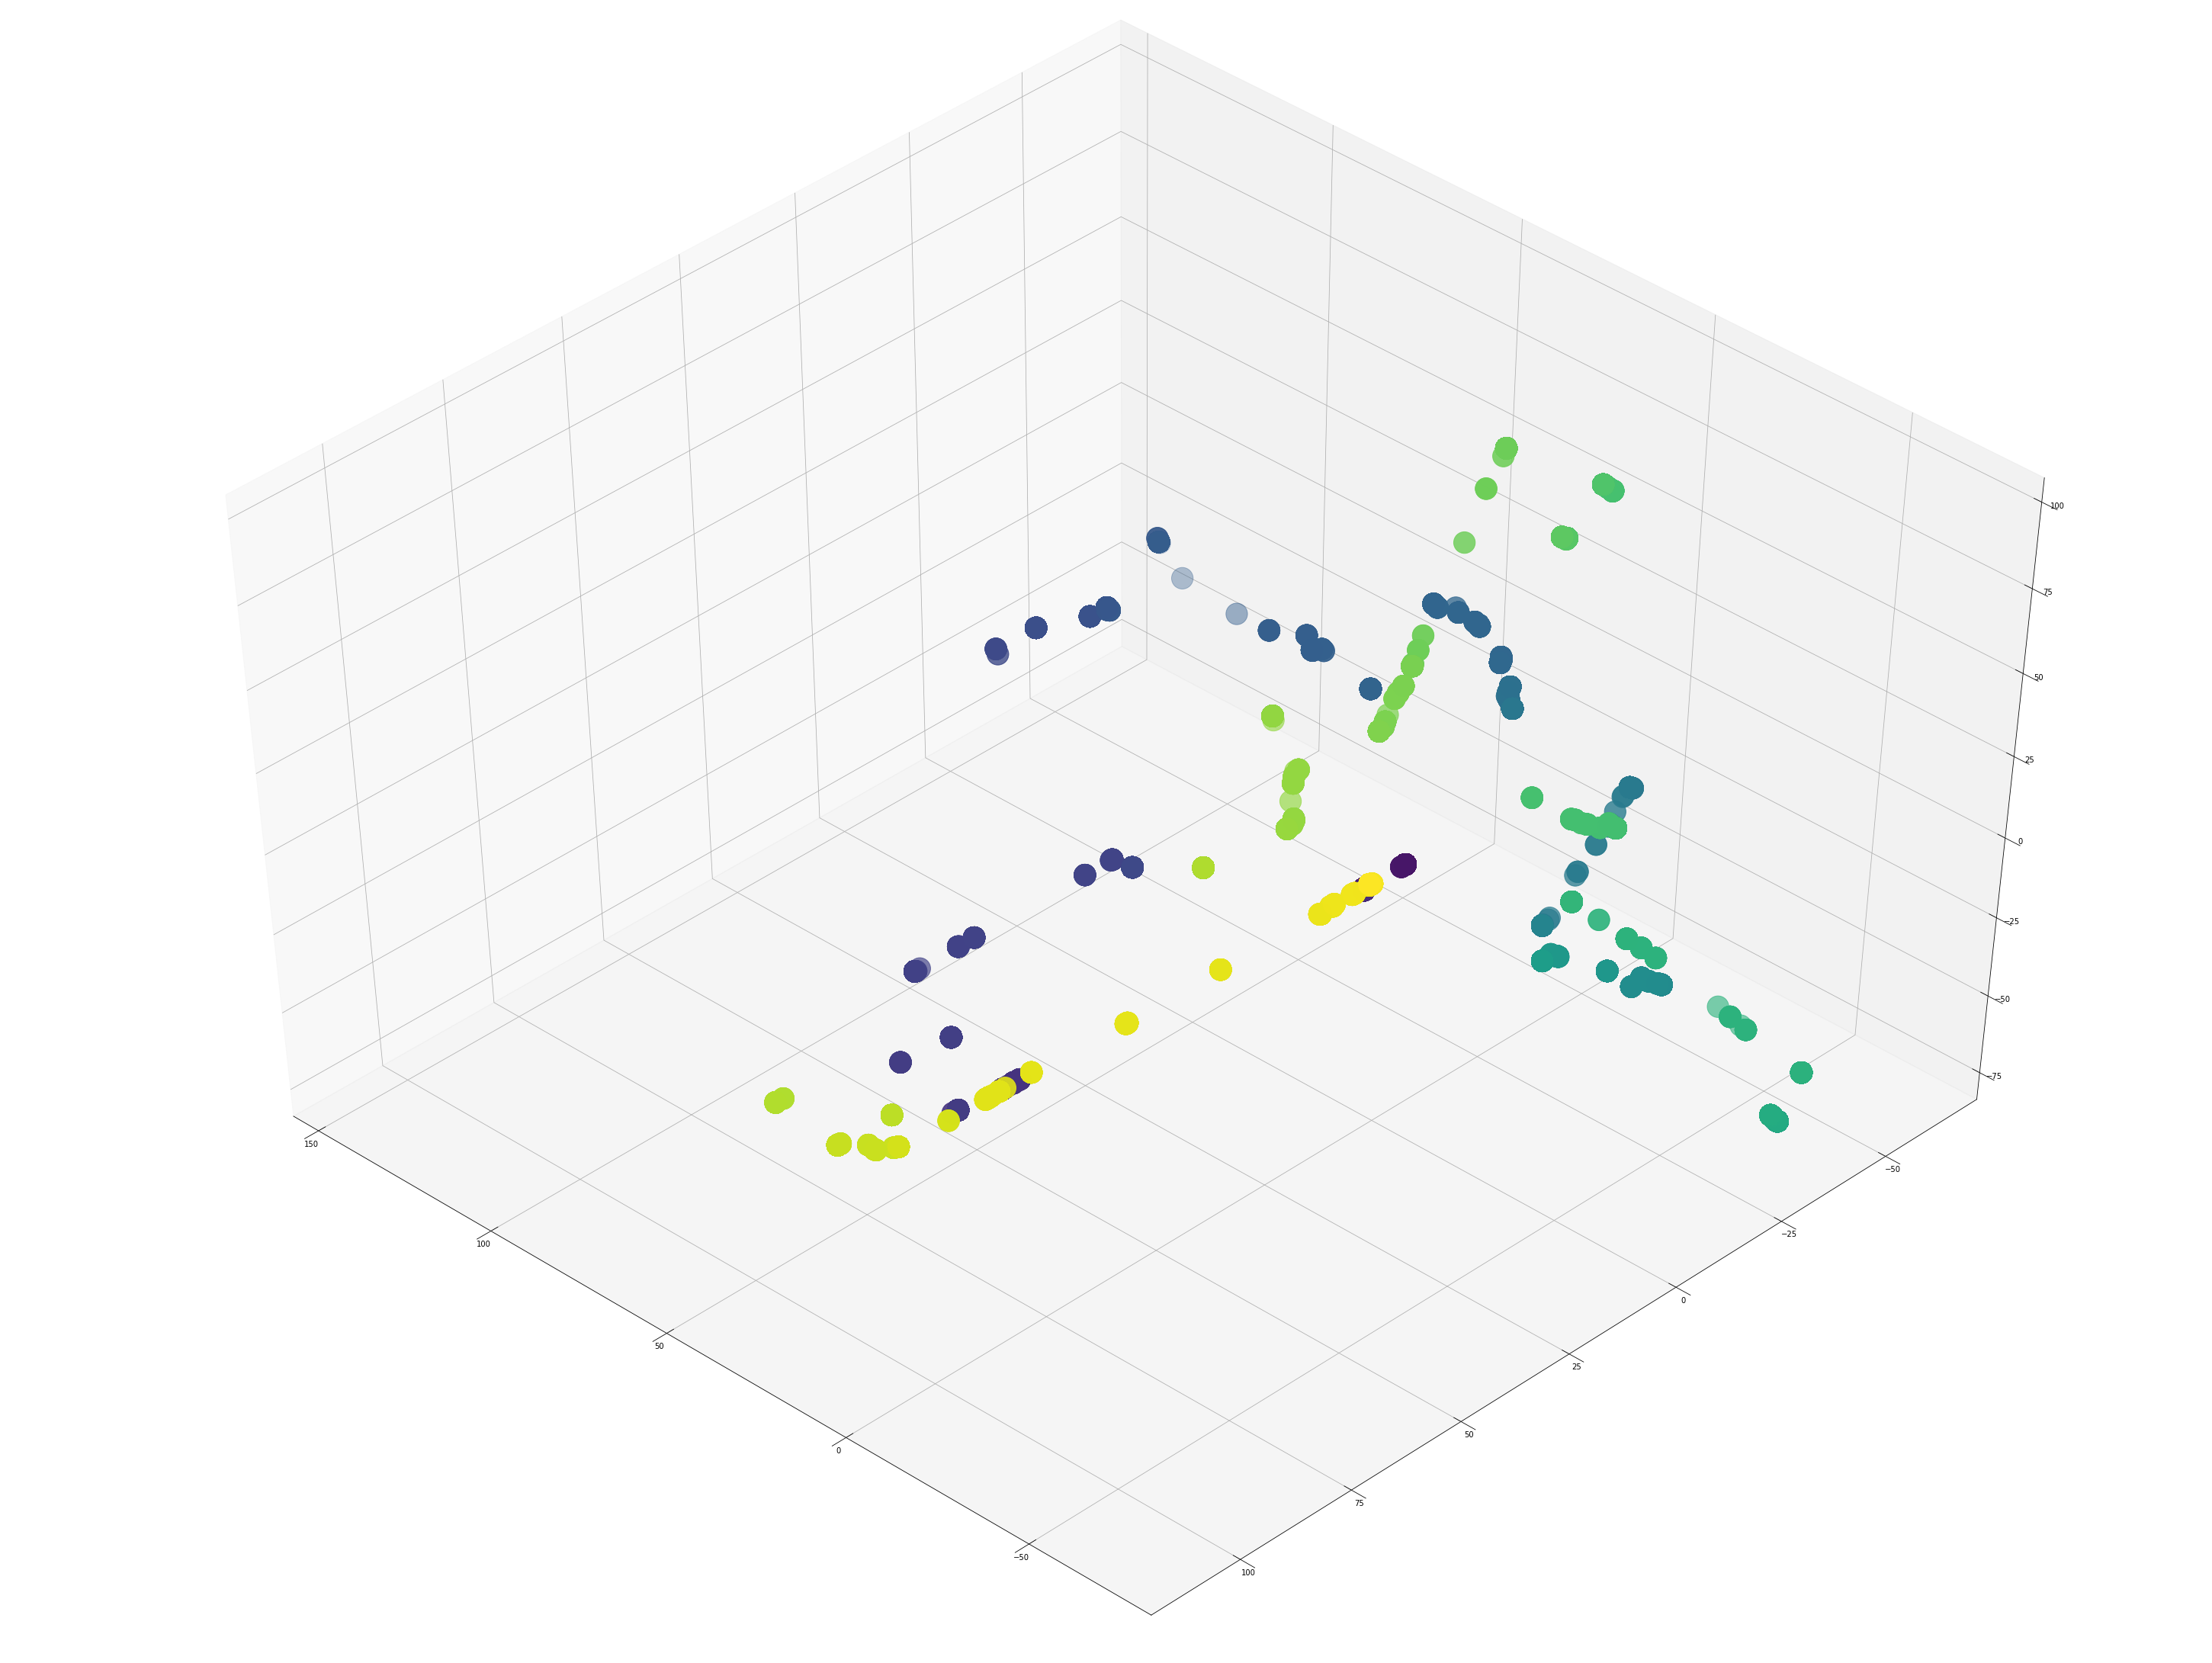

In [10]:
#subprocedure to do PCA and plot the results
import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.mplot3d import Axes3D
import csv
from sklearn import decomposition

X = numpy.genfromtxt('file_with_points.csv', delimiter=',')

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 10, 10], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA()
pca.fit(X)
X = pca.transform(X)

size = [800 for n in range(len(X[:,0]))]
color = [100*n for n in range(len(X[:,0]))]
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=size,c=color)#
#ax.scatter(X[:, 0], X[:, 1],s=size,c=color)#projection to 2d, use for planar maps.

plt.show()
